### Exercise 19

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook
import time

**Trainning data**

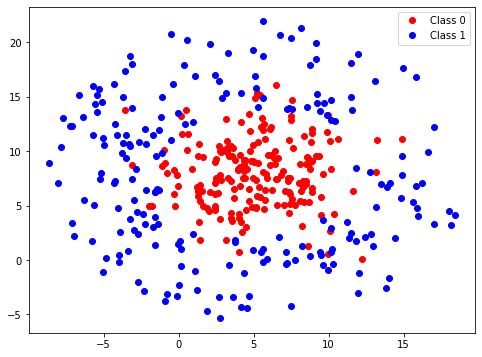

In [4]:
# Synthetic data
m_= 200
mu = np.array([5,8])
sigma = np.array([[10,0],[0,10]])
X1 = np.random.multivariate_normal(mu,sigma,m_)

phi = np.random.uniform(0,2*np.pi,m_).reshape(-1,1)
r = 6 + np.random.uniform(0,8,m_).reshape(-1,1)
X2 = np.concatenate((r*np.cos(phi)+mu[0],r*np.sin(phi)+mu[1]),1)

plt.figure(figsize=(8,6))
plt.plot(X1[:,0],X1[:,1],'ro',label = 'Class 0')
plt.plot(X2[:,0],X2[:,1],'bo',label = 'Class 1')
plt.legend()
plt.show()

X = np.concatenate((X1,X2),0)
y = np.concatenate((np.ones((m_,1)),np.zeros((m_,1))),0)

In [3]:
X.shape,y.shape

((400, 2), (400, 1))

**Neural Network architecture**

Data structure needed: weights, linear activation, nonlinear acitivation, delta

All depends on how many units per layer

2 hidden layers. 2 units each

- $\mathtt{W}^{[1]}: 4x2$
- $\mathbf{b}^{[1]}: 4x1$
- $\mathtt{W}^{[2]}: 3x4$
- $\mathbf{b}^{[2]}: 3x1$
- $\mathtt{W}^{[1]}: 1x3$
- $\mathbf{b}^{[1]}: 1x1$

How to initialize the weights?
- small random normal values with mean 0
- Xavier/He initialization

In [12]:
W = {}
W[1]=np.random.normal(0,0.1,(4,2))
W[2]=np.random.normal(0,0.1,(3,4))
W[3]=np.random.normal(0,0.1,(1,3))

b ={}
b[1]=np.zeros((4,1)) + 0.5
b[2]=np.zeros((3,1)) + 0.5
b[3]=np.zeros((1,1))



def sigmoid(z):
    return 1/(1+np.exp(-z))

def sigmoid_der(z):
    a = sigmoid(z)
    return a*(1-a)

def relu(z):
    return np.where(z>0,z,0)

def relu_der(z):
    return np.where(z>0,1,0)

g ={}
g[1]=relu
g[2]=relu
g[3]=sigmoid

gprime ={}
gprime[1] =relu_der
gprime[2] =relu_der
gprime[3] =sigmoid_der

In [13]:
# Forward propagation
def forward(W,b,z,a,g,x):
    L = len(W)
    a[0]=x
    for l in range(1, L+1):
        z[l]=W[l]@a[l-1]+b[l]
        a[l]=g[l](z[l])
        
# Backpropagation        
def backward(W, a, z,delta,y):
    L = len(W)
    dW = {}
    db = {}
    delta[L] = a[L] - y
    for l in range(L,0,-1):
        # Calculate gradient for weights
        dW[l]=delta[l]@a[l-1].T
        # Calculate gradient for biases
        db[l]=delta[l]
        # Calculate previous layer's deltas
        if l>1:
            delta[l-1] = np.diag(gprime[l-1](z[l-1]).reshape(-1))@W[l].T@delta[l]
    return dW,db
def update_weights(W,b,dW,db,alpha):
    L = len(W)
    for l in range(1, L+1):
        W[l] = W[l] - alpha *dW[l]
        b[l] = b[l] - alpha *db[l]

In [15]:
# Training loop
a = {}
z = {}
delta = {}

epochs = 1000
alpha = 0.001
m = X.shape[0]
L = len(W)
loss_epoch = []
for epoch in tqdm_notebook(range(epochs),desc = "Progress Bar"):
    time.sleep(0)
    index = np.arange(m)
    np.random.shuffle(index)
    iter_loss = 0
    for iter in range(m):
        x = X[index[iter],:].reshape(-1,1)
        target = y[index[iter],:].reshape(-1,1)
        forward(W,b,z,a,g,x)
        dW,db =  backward(W, a, z,delta,target)
        update_weights(W,b,dW,db,alpha)
        loss = (- (target*np.log(a[L]) + (1- target)*np.log(1-a[L]))).sum() #cross entropy loss
        iter_loss += loss
    loss_epoch.append(iter_loss/m)
    if epoch%100 ==0:
        print('Epoch %d loss %f' %(epoch,iter_loss/m))

Progress Bar:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 0 loss 0.696168
Epoch 100 loss 0.438723
Epoch 200 loss 0.331857
Epoch 300 loss 0.303177
Epoch 400 loss 0.267007
Epoch 500 loss 0.261711
Epoch 600 loss 0.250626
Epoch 700 loss 0.250148
Epoch 800 loss 0.240314
Epoch 900 loss 0.240741


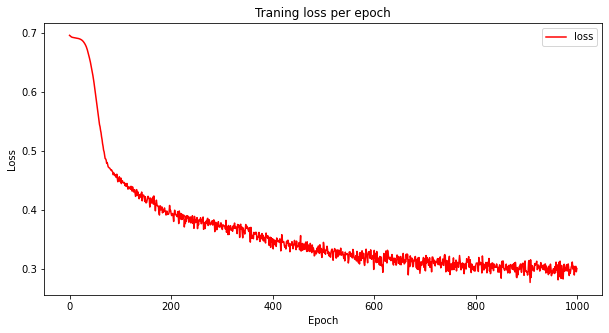

In [7]:
plt.figure(figsize = (10,5))
plt.plot(loss_epoch,'r-',label='loss')
plt.title('Traning loss per epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [9]:
def accuracy(X,y,W,b,g):
    m = X.shape[0]
    L = len(W)
    a={}
    z={}
    sum = 0
    y_pred = []
    for i in range(m):
        x = X[i,:].reshape(-1,1)
        target = y[i,:].reshape(-1,1)
        forward(W,b,z,a,g,x)
        y_pred.append(np.where(a[L]>0.5,1.0,0.0))
        sum += np.where(a[L]>0.5,1.0,0.0) == target
    return sum[0,0]/m,y_pred
acc,y_pred = accuracy(X,y,W,b,g)
print('Accuracy',acc)

Accuracy 0.5


In [10]:
# predict function
def predict(W,b,z,a,g,X):
    m = X.shape[0]
    L = len(W)
    a={}
    z={}
    results = np.zeros((m,1))
    for i in range(m):
        x = X[i,:].reshape(-1,1)
        forward(W,b,z,a,g,x)
        results[i] = a[L]
    return np.where(results>0.5,1.0,0.0)

In [11]:
pred = predict(W,b,z,a,g,X)

NameError: name 'z' is not defined

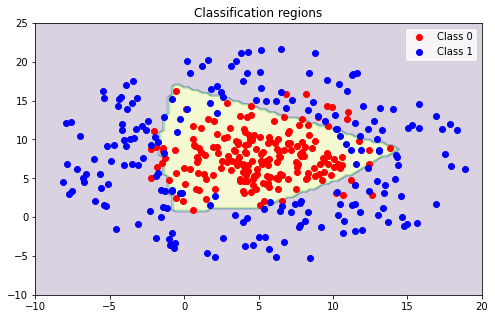

In [10]:
# Plot result
plt.figure(figsize = (8,5))
plt.plot(X1[:,0],X1[:,1],'ro',label='Class 0')
plt.plot(X2[:,0],X2[:,1],'bo',label='Class 1')

# Overlay colored regions
grid_x,grid_y = np.mgrid[-10:20:100j,-10:25:100j]
grid_xy = np.vstack([grid_x.ravel(),grid_y.ravel()]).T
z = predict(W,b,z,a,g,grid_xy).reshape((100,100))
plt.contourf(grid_x,grid_y,z,alpha = 0.2)


plt.title('Classification regions')
plt.legend()
plt.show()